## Feature Binning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [16]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           9755 non-null   object 
 3   Age              9713 non-null   float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [17]:
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [18]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [7]:
df.Age.min()

np.float64(18.0)

In [11]:
df.Age.max()

np.float64(92.0)

In [ ]:
labels = ['0-20', '21-40', '41-60', '61-above']
bins = [0, 21,41,61,100]

df['Age_bins'] = pd.cut(df.Age, bins, labels, include_lowest=True)

In [23]:
df[['Age', "Age_bins"]].to_csv('test.csv')

In [24]:
df.Age_bins.value_counts()

Age_bins
(21.0, 41.0]      6641
(41.0, 61.0]      2560
(61.0, 100.0]      380
(-0.001, 21.0]     132
Name: count, dtype: int64

Text(0, 0.5, 'Age Count')

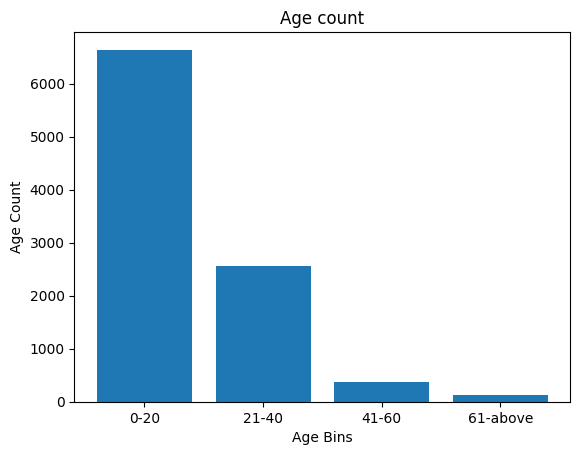

In [27]:
plt.bar(labels,df.Age_bins.value_counts())

plt.title('Age count')
plt.xlabel('Age Bins')
plt.ylabel('Age Count')